### **Introduction** : 
S-Mart, a global leader in electronics retail, faced an unprecedented drop in sales in 2020. This analysis aims to uncover the root causes of this decline through a systematic examination of sales data, customer behaviours, and market conditions.

### **Objectives of the Analysis:**
* Identify key trends and changes in customer purchasing behaviour from 2016 to 2020.
* Root cause analysis of the drop in revenue between year 2019 and 2020
* Evaluate the impact of external factors on sales performance.
* Develop insights into customer loyalty and engagement to inform future strategies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df_customer = pd.read_csv('Customers.csv', encoding='latin-1'  )
df_product = pd.read_csv('Products.csv')
df_sales = pd.read_csv('Sales.csv')


## Data quality check

In [124]:
df_customer.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [125]:
df_product.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


In [122]:
df_sales.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
5304,729681,Female,Rossana Padovesi,Polvica,NaN,Napoli,80035,Italy,Europe,4/18/1981
5316,732289,Male,Indro Piccio,Varcaturo,NaN,Napoli,80014,Italy,Europe,2/24/1949
5372,742042,Male,Amaranto Loggia,Casaferro,NaN,Napoli,80034,Italy,Europe,3/14/1936
5377,742886,Female,Edmonda Capon,Terzigno,NaN,Napoli,80040,Italy,Europe,8/6/1963
5378,743343,Female,Ambra Sagese,Pomigliano D'Arco,NaN,Napoli,80038,Italy,Europe,1/5/1961
5485,759705,Male,Callisto Lo Duca,Casilli,NaN,Napoli,80047,Italy,Europe,8/28/1976
5525,765589,Male,Michelino Lucchesi,Pompei Scavi,NaN,Napoli,80045,Italy,Europe,11/13/1947
5531,766410,Male,Adelmio Beneventi,Licola,NaN,Napoli,80078,Italy,Europe,1/13/1940
5631,781667,Female,Ilda Manna,Napoli,NaN,Napoli,80134,Italy,Europe,5/8/1977
5695,789177,Male,Calogero Folliero,Mariglianella,NaN,Napoli,80030,Italy,Europe,3/3/2000


In [127]:
# replace null sate code with 'NA' for state =Napoli  
df_customer['State Code'].fillna('NA', inplace=True)


In [128]:
# df_customer.describe()
#  show null records rows
# df_customer[df_customer.isnull().any(axis=1)]
# print(df_customer.isnull().sum())
# print(df_customer.duplicated().sum())
# df_customer.nunique()

# df_product.info()
# df_product.nunique()

# df_sales.info()
# df_sales.nunique()
# print(df_sales.duplicated().sum())
# print(len(df_sales))


62884


### Merge 3 data sets

In [134]:
# combine the dataframes df_customer, df_product, df_sales
df = pd.merge(df_sales, df_product, on='ProductKey', how='left')
df = pd.merge(df, df_customer, on='CustomerKey', how='left')


In [135]:
# show all column
pd.set_option('display.max_columns', None)
df.head(2)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD,Contoso Lens Adapter M450 White,Contoso,White,$31.27,$68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,Male,Tyler Vaught,London,ON,Ontario,N5W 5K6,Canada,North America,3/23/1971
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD,A. Datum SLR Camera X136 Silver,A. Datum,Silver,$141.47,$427.00,402,Digital SLR Cameras,4,Cameras and camcorders,Male,Frank Upchurch,Auberry,CA,California,93602,United States,North America,11/20/1995


In [131]:
# df.info()
# df.nunique()

## Data pre-processing and feature engineering

In [136]:
def clean_data(df):
    """
    Cleans the data by removing '$' and ',' signs from the specified columns and converting them to numeric type.
    Also converts 'Order Date', 'Delivery Date', and 'Birthday' columns to datetime.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data to be cleaned.

    Returns:
    pandas.DataFrame: The cleaned DataFrame.
    """

    # Remove '$' and ',' sign from the columns and convert to numeric type
    df['Unit Price USD'] = df['Unit Price USD'].str.replace('$', '').str.replace(',', '').astype(float)
    df['Unit Cost USD'] = df['Unit Cost USD'].str.replace('$', '').str.replace(',', '').astype(float)

    # Convert 'Order Date', 'Delivery Date', and 'Birthday' to datetime
    df['Birthday'] = pd.to_datetime(df['Birthday'])
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])

    return df
df = clean_data(df)

c:\Users\dharma\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
c:\Users\dharma\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  from ipykernel import kernelapp as app


In [137]:
def calculate_metrics(df):
    """
    Calculates various profit metrics based on the given DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the necessary columns.

    Returns:
    pandas.DataFrame: The DataFrame with additional columns for profit metrics.
    """

    # Calculate unit profit
    df['unit_profit'] = df['Unit Price USD'] - df['Unit Cost USD']

    # Calculate total profit, total revenue, and total cost
    df['total_profit'] = df['unit_profit'] * df['Quantity']
    df['total_revenue'] = df['Unit Price USD'] * df['Quantity']
    df['total_cost'] = df['Unit Cost USD'] * df['Quantity']


    # Extract year, month, and quarter from 'Order Date'
    df['Order Year'] = df['Order Date'].dt.year
    df['Order Month'] = df['Order Date'].dt.month
    df['Order Quarter'] = df['Order Date'].dt.quarter

    # Calculate delivery time
    df['delivery_time'] = df['Delivery Date'] - df['Order Date']

    return df

# Example usage
df = calculate_metrics(df)
df.head(2)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,unit_profit,total_profit,total_revenue,total_cost,Order Year,Order Month,Order Quarter,delivery_time
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.0,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,Male,Tyler Vaught,London,ON,Ontario,N5W 5K6,Canada,North America,1971-03-23,36.73,36.73,68.0,31.27,2016,1,1,NaT
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,A. Datum SLR Camera X136 Silver,A. Datum,Silver,141.47,427.0,402,Digital SLR Cameras,4,Cameras and camcorders,Male,Frank Upchurch,Auberry,CA,California,93602,United States,North America,1995-11-20,285.53,571.06,854.0,282.94,2016,1,1,12 days


In [138]:
# df.columns

## EDA

<AxesSubplot:title={'center':'Total Profit by Year'}, xlabel='Order Year'>

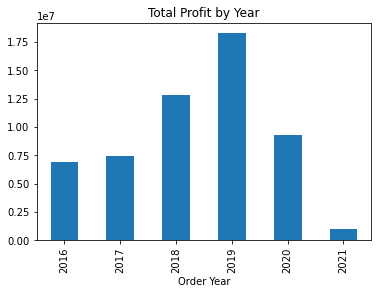

In [156]:
df.groupby('Order Year')['total_revenue'].sum().plot(kind='bar', title='Total Profit by Year')

<Figure size 720x360 with 0 Axes>

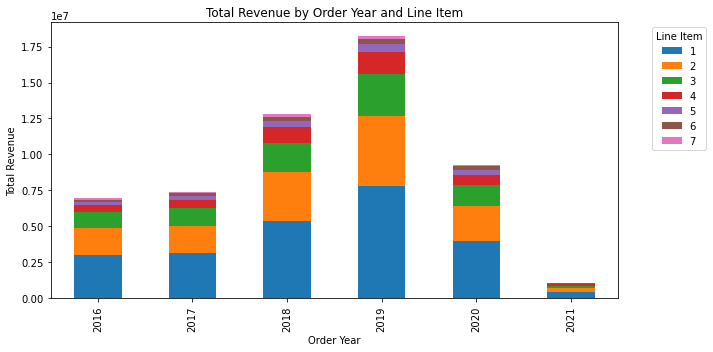

<Figure size 720x360 with 0 Axes>

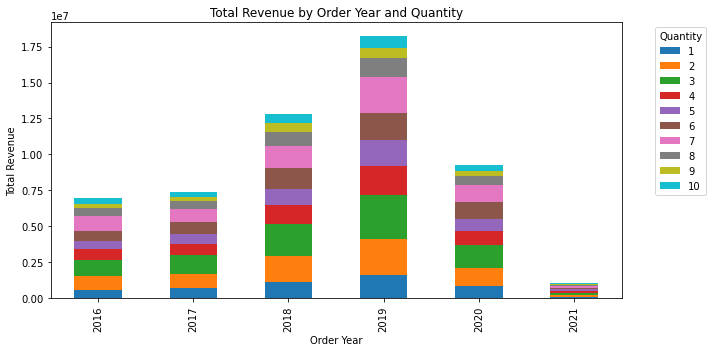

<Figure size 720x360 with 0 Axes>

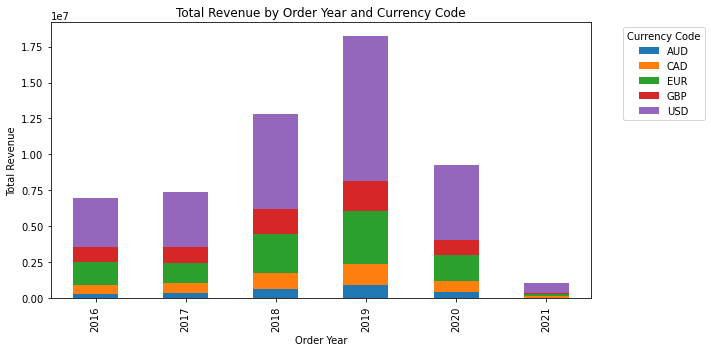

<Figure size 720x360 with 0 Axes>

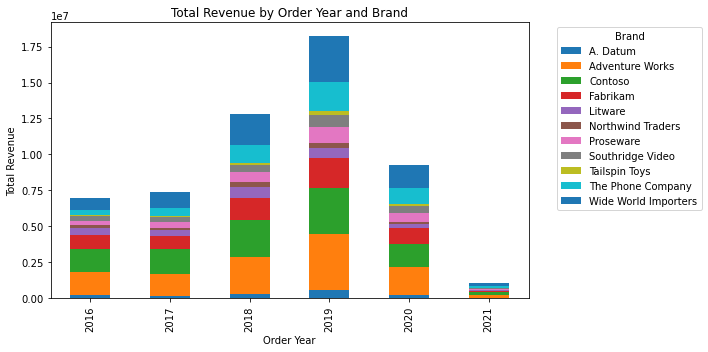

<Figure size 720x360 with 0 Axes>

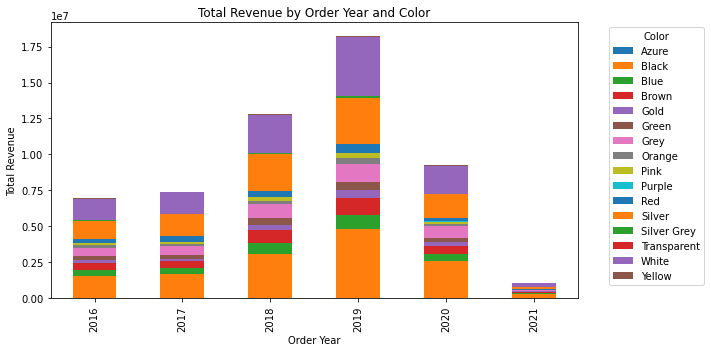

<Figure size 720x360 with 0 Axes>

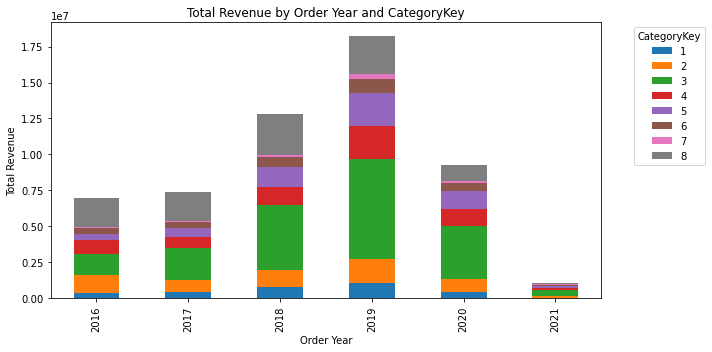

<Figure size 720x360 with 0 Axes>

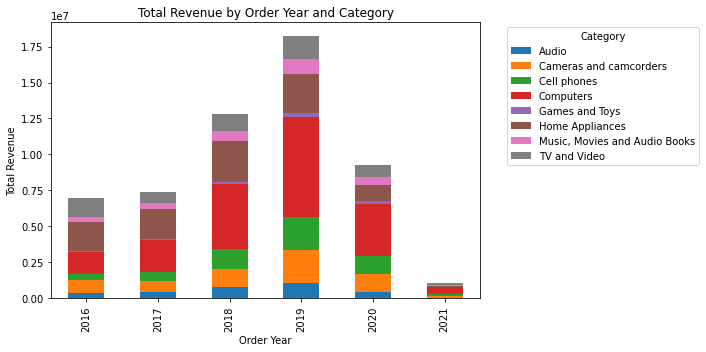

<Figure size 720x360 with 0 Axes>

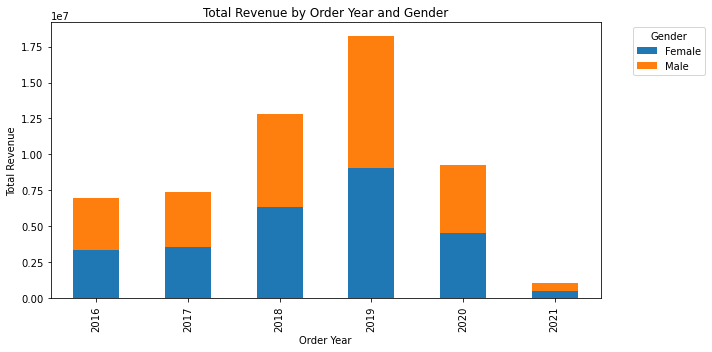

<Figure size 720x360 with 0 Axes>

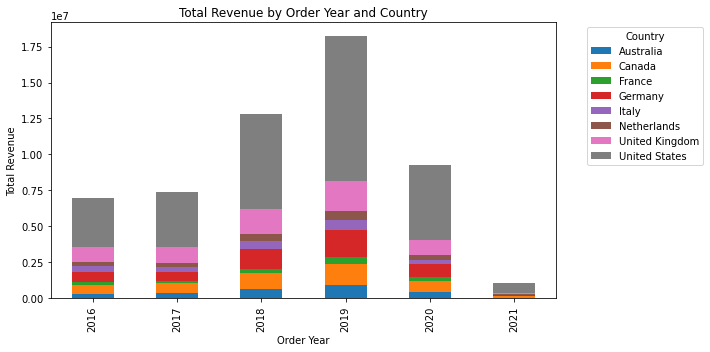

<Figure size 720x360 with 0 Axes>

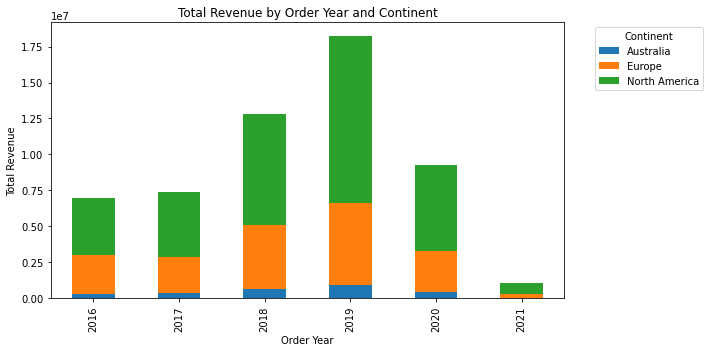

In [158]:

cat_cols = ['Line Item', 'Quantity', 'Currency Code', 'Brand', 'Color', 'CategoryKey', 'Category', 'Gender', 'Country', 'Continent']

for col in cat_cols:
    plt.figure(figsize=(10, 5))
    grouped_df = df.groupby(['Order Year', col])['total_revenue'].sum().unstack()

    # Create stacked bar plot
    ax = grouped_df.plot(kind='bar', stacked=True, figsize=(10, 5))

    # Set labels and title
    plt.xlabel('Order Year')
    plt.ylabel('Total Revenue')
    plt.title('Total Revenue by Order Year and ' + col)

    # Move the legend outside of the plot
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')

    # Show the plot
    plt.tight_layout()  # Adjust layout to make room for the legend
    plt.show()


<Figure size 720x360 with 0 Axes>

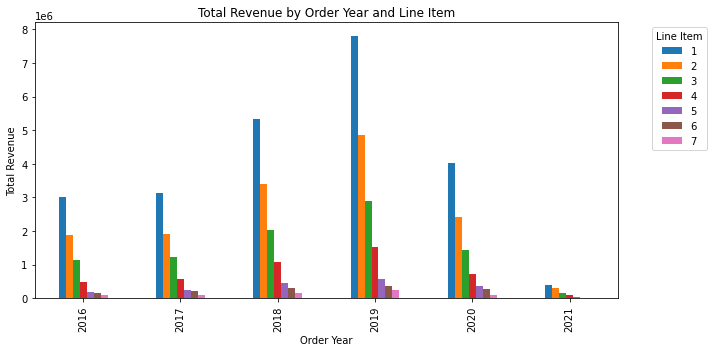

<Figure size 720x360 with 0 Axes>

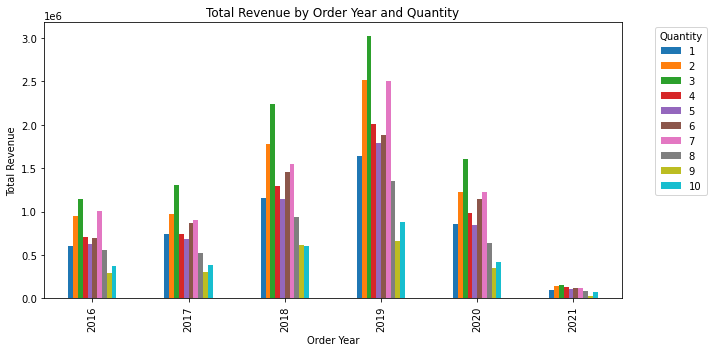

<Figure size 720x360 with 0 Axes>

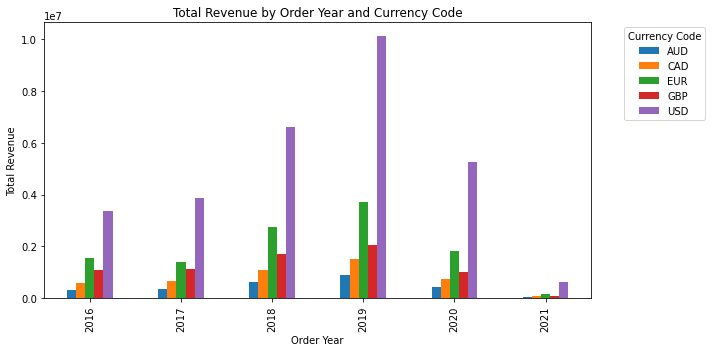

<Figure size 720x360 with 0 Axes>

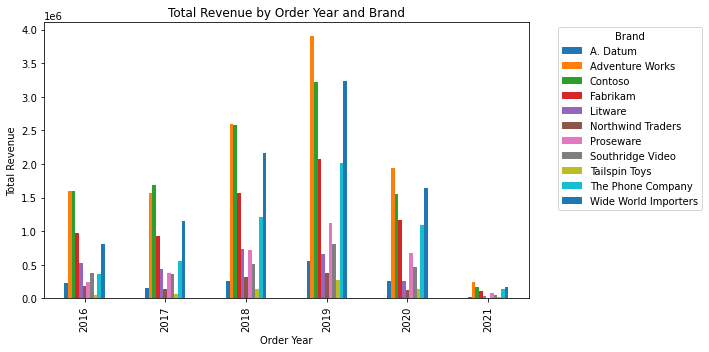

<Figure size 720x360 with 0 Axes>

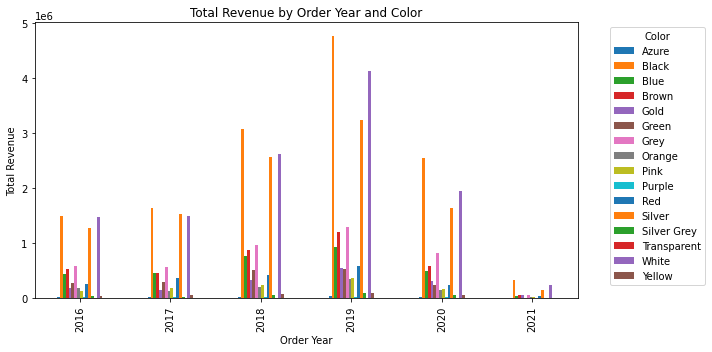

<Figure size 720x360 with 0 Axes>

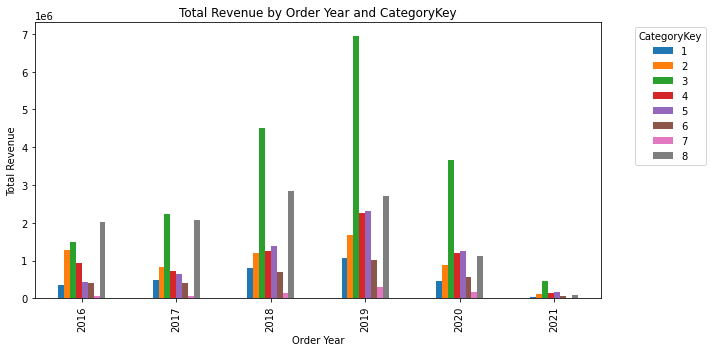

<Figure size 720x360 with 0 Axes>

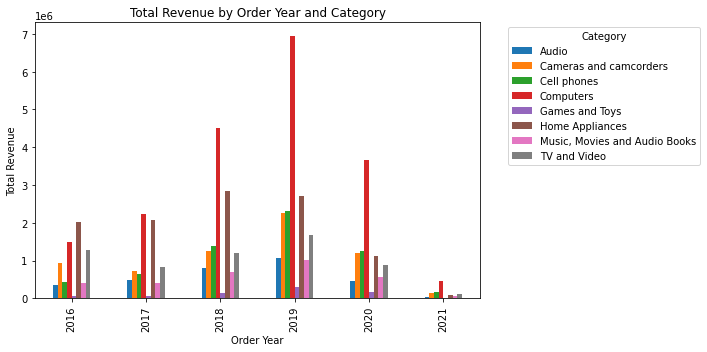

<Figure size 720x360 with 0 Axes>

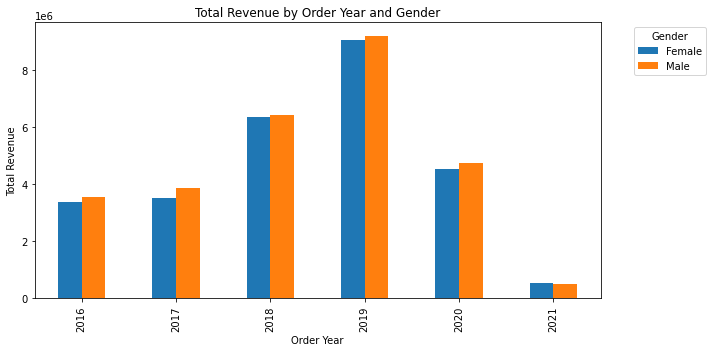

<Figure size 720x360 with 0 Axes>

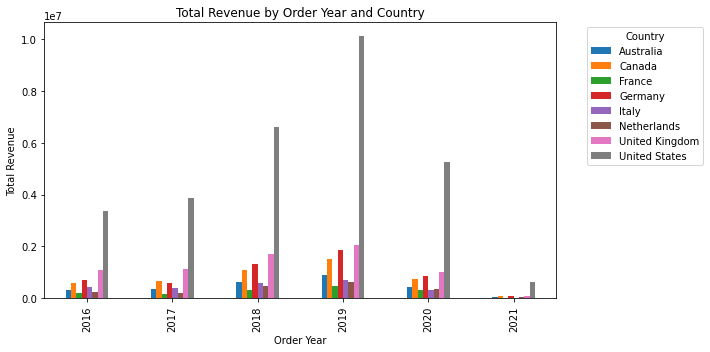

<Figure size 720x360 with 0 Axes>

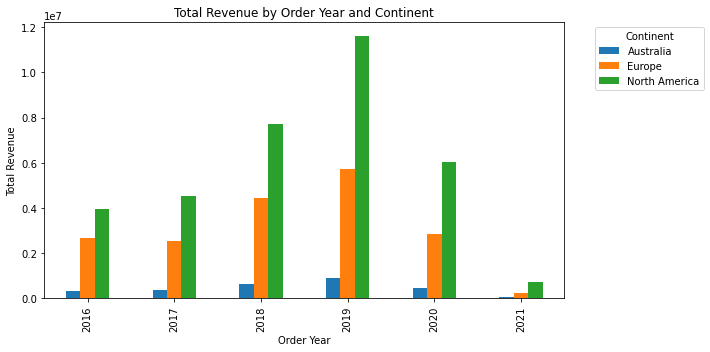

In [143]:

# Filter the dataframe to include only the years 2019 and 2020
df_filtered = df[df['Order Year'].isin([2019, 2020])]

for col in cat_cols:
    plt.figure(figsize=(10, 5))
    
    grouped_df = df.groupby(['Order Year', col])['total_revenue'].sum().unstack()

    # Create side bar plot
    ax = grouped_df.plot(kind='bar', figsize=(10, 5))

    # Set labels and title
    plt.xlabel('Order Year')
    plt.ylabel('Total Revenue')
    plt.title('Total Revenue by Order Year and ' + col)

    # Move the legend outside of the plot
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')

    # Adjust layout to make room for the legend
    plt.tight_layout()
    plt.show()

### Observations
* There is a noticeable and uniform drop in total revenue across all categories from 2019 to 2020, with no specific sub-category suffering significantly more than others.
* The decline is consistent across various metrics such as line items, quantities, currency codes, brands, colors, category keys, and product categories.
* Both female and male customer segments, as well as all geographical regions (countries and continents), experienced revenue drops.
* High-revenue categories like "Cameras and camcorders" and "Computers" showed substantial declines, but this trend is widespread across all categories.

## customer engagement meterics

In [164]:
import pandas as pd

# Define functions to calculate each metric

def calculate_purchase_frequency(data):
    """Calculate the average number of purchases per customer."""
    purchase_counts = data.groupby(['CustomerKey']).size()  # Count purchases per customer
    return purchase_counts.mean()  # Return the average number of purchases

def calculate_average_order_value(data):
    """Calculate the average order value."""
    return data['total_revenue'].sum() / len(data)  # Total revenue divided by number of orders

def calculate_retention_rate(data, year):
    """Calculate customer retention rate between years."""
    # Get customers from the given year
    customers_year1 = set(data[data['Order Date'].dt.year == year]['CustomerKey'])
    # Get customers from the following year
    customers_year2 = set(data[data['Order Date'].dt.year == year + 1]['CustomerKey'])
    # Find the intersection of both sets (retained customers)
    retained_customers = customers_year1.intersection(customers_year2)
    # Calculate retention rate
    if customers_year1:
        return len(retained_customers) / len(customers_year1)
    else:
        return 0

def calculate_clv(data):
    """Calculate Customer Lifetime Value by taking the total total_revenue and dividing by the number of unique customers."""
    total_revenue = data['total_revenue'].sum()  # Sum of total revenue
    unique_customers = data['CustomerKey'].nunique()  # Count of unique customers
    return total_revenue / unique_customers if unique_customers else 0  # Calculate CLV

# Define a dictionary to hold the data for each year
yearly_metrics = {}

# Loop through each year from 2016 to 2020
for year in range(2016, 2021):
    # Filter data for the specific year
    year_data = df[df['Order Date'].dt.year == year]
    
    # Calculate metrics for the year
    clv = calculate_clv(year_data)  # Customer Lifetime Value
    purchase_frequency = calculate_purchase_frequency(year_data)  # Purchase Frequency
    aov = calculate_average_order_value(year_data)  # Average Order Value
    sales_volume = year_data['Quantity'].sum()  # Sales Volume
    
    # Populate the dictionary with the calculated metrics
    yearly_metrics[year] = {
        'CLV': clv,
        'Purchase Frequency': purchase_frequency,
        'AOV': aov,
        'Sales Volume': sales_volume
    }

    # Calculate retention rate if possible (requires data from the next year, which isn't completly available for 2020)
    if year < 2020:
        retention_rate = calculate_retention_rate(df, year)
        yearly_metrics[year]['Retention Rate'] = retention_rate

# Convert the dictionary to a DataFrame for better visualization
metrics_df = pd.DataFrame(yearly_metrics).T  # Transpose to get years as rows

# Display the metrics DataFrame
metrics_df


,CLV,Purchase Frequency,AOV,Sales Volume,Retention Rate
2016,2712.531652,2.696212,1006.052652,21761.0,0.207341
2017,2552.948837,2.732026,934.452565,24798.0,0.352941
2018,2683.937179,2.977545,901.392773,44498.0,0.465687
2019,2811.202475,3.326304,845.142866,68440.0,0.285209
2020,2402.955569,2.850569,842.974074,34463.0,NaN


### Observation
* The drop in revenue from 2019 to 2020 can be attributed to multiple factors: a decline in customer purchase frequency, lower average order values, reduced sales volume, and decreased customer retention.
* These metrics collectively indicate that both customer behavior and transaction values were negatively impacted, leading to the overall revenue decline observed during this period.

## Loyalty Score

In [166]:
import pandas as pd
import numpy as np

def get_loyalty_score(data):
    """Calculate loyalty scores and analyze average loyalty score by year."""
    # Calculate recency as days since last purchase in the dataset
    data['Recency'] = (data['Order Date'].max() - data['Order Date']).dt.days
    
    # Calculate the length of relationship as years since the first purchase
    data['Customer Start Year'] = data.groupby('CustomerKey')['Order Date'].transform('min').dt.year
    data['Length of Relationship'] = data['Order Date'].dt.year - data['Customer Start Year']
    
    # Calculate the scores for Recency, Frequency, Monetary, and Length of Relationship
    data['Recency Score'] = pd.qcut(data['Recency'], 4, labels=False, duplicates='drop') + 1
    data['Frequency Score'] = pd.qcut(data.groupby('CustomerKey').size(), 4, labels=False, duplicates='drop') + 1
    data['Monetary Score'] = pd.qcut(data.groupby('CustomerKey')['total_revenue'].transform('sum'), 4, labels=False, duplicates='drop') + 1
    data['Relationship Score'] = pd.qcut(data['Length of Relationship'], 4, labels=False, duplicates='drop') + 1
    
    # Combine scores to form a Loyalty Score
    data['Loyalty Score'] = (data['Recency Score'] + data['Frequency Score'] + data['Monetary Score'] + data['Relationship Score']) / 4
    
    # Analyze the average Loyalty Score by year
    loyalty_scores_by_year = data.groupby(data['Order Date'].dt.year)['Loyalty Score'].mean()
    
    return loyalty_scores_by_year

# Load data
# df = pd.read_csv('your_data.csv')  # Uncomment and modify to load your data

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Get loyalty scores by year
loyalty_scores_by_year = get_loyalty_score(df)

# Display the results
loyalty_scores_by_year


Order Date
2016    2.388889
2017    2.241071
2018    2.221591
2019    1.908824
2020    1.697368
2021    1.650000
Name: Loyalty Score, dtype: float64

* Consistent Decrease in Loyalty Scores:

The loyalty scores show a consistent decrease from 2019 to 2020, indicating a decline in overall customer loyalty and engagement.

## Key observation
* Monthly Analysis: After a relatively stable start in 2020 with even slight increases in January and February compared to 2019, there's a marked decline from March onwards, which aligns with global events related to the COVID-19 pandemic.

* Purchase Frequency: This metric peaked in 2019 and then decreased in 2020, suggesting that customers made fewer purchases during the pandemic year.

* Sales Volume: There was a significant increase in sales volume until 2019, followed by a drastic fall in 2020. This drop aligns with the global impact of COVID-19 on consumer behaviour and supply chains

* Loyalty Scores: There is a clear downward trend in the Loyalty Scores from 2016 to 2020. This decline indicates that over the years, customer loyalty at Scaler Mart has been decreasing


## Root Cause
* The decline in revenue can be attributed to a combination of external and internal factors. This analysis identifies the most impactful reasons for the downturn and provides context for my recommendations.

1. Impact of COVID-19 on consumer spending and supply chains.
2. Decreased customer loyalty and engagement as shown by falling loyalty scores.
3. Low retention rates indicating challenges in maintaining customer relationships


## Recommendations
*Based on my analysis, I propose several strategic actions to address the challenges identified and to position Scaler Mart for future growth.

1. Enhance customer retention programs through personalized marketing and loyalty rewards.
2. Invest in digital transformation to improve online shopping experiences and capture more e-commerce market share.
3. Utilize data analytics more effectively to respond quickly to market changes and customer needs.
